In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests as req
import pandas as pd
import json

In [2]:
# Save config information.
api_key = "15383539ac6ad7827e835523385021b3"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=15383539ac6ad7827e835523385021b3&units=metric&q='

In [3]:
weather_data = []
cities = ["Pune", "Alexandria", "Addis Ababa", "Casablanca", "Santiago", "Kolkata"]

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = req.get(query_url + city).json()
    weather_data.append(response)

In [46]:
for x in weather_data:
    print(json.dumps(x, indent=3))

{
   "coord": {
      "lon": 73.86,
      "lat": 18.52
   },
   "weather": [
      {
         "id": 800,
         "main": "Clear",
         "description": "clear sky",
         "icon": "01d"
      }
   ],
   "base": "stations",
   "main": {
      "temp": 21.81,
      "pressure": 951.68,
      "humidity": 63,
      "temp_min": 21.81,
      "temp_max": 21.81,
      "sea_level": 1026.5,
      "grnd_level": 951.68
   },
   "wind": {
      "speed": 1.86,
      "deg": 82.0005
   },
   "clouds": {
      "all": 0
   },
   "dt": 1510194536,
   "sys": {
      "message": 0.1647,
      "country": "IN",
      "sunrise": 1510189679,
      "sunset": 1510230511
   },
   "id": 1259229,
   "name": "Pune",
   "cod": 200
}
{
   "coord": {
      "lon": 29.96,
      "lat": 31.22
   },
   "weather": [
      {
         "id": 800,
         "main": "Clear",
         "description": "clear sky",
         "icon": "01n"
      }
   ],
   "base": "stations",
   "main": {
      "temp": 15.71,
      "pressure": 1020,
 

In [47]:
# Extract interesting data from responses
lon_data = [data.get("coord").get("lon") for data in weather_data]
pressure_data = [data.get("main").get("pressure") for data in weather_data]
names_data = [data.get("name") for data in weather_data]

weather_data = {"Pressure": pressure_data, "Longitude": lon_data, "City" : names_data}
weather_data = pd.DataFrame(weather_data)
weather_data

,City,Longitude,Pressure
0,Pune,73.86,951.68
1,Alexandria,29.96,1020.00
2,Addis Ababa,38.75,777.40
3,Casablanca,-7.62,1020.00
4,Santiago,-70.65,1016.00
5,Kolkata,88.37,1013.00


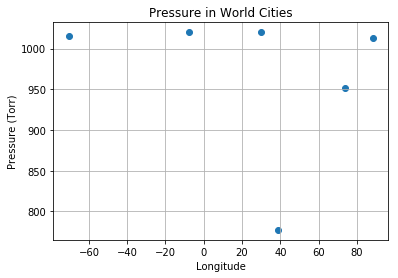

In [48]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Longitude"], weather_data["Pressure"], marker="o")

# Incorporate the other graph properties
plt.title("Pressure in World Cities")
plt.ylabel("Pressure (Torr)")
plt.xlabel("Longitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

In [49]:
# Creating with pandas plot
weather_plot = weather_data.plot(kind="scatter", x="Longit", y="temp")
weather_plot.set_xlabel("Latitude")
weather_plot.set_ylabel("Temperature (Celsius)")
weather_plot.set_title("Temperature in World Cities")
plt.grid(True)

plt.show()

KeyError: 'Longit'